In [7]:
import os
import torch
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

from conditional_rate_matching.configs.config_files import ExperimentFiles

from conditional_rate_matching.models.trainers.crm_trainer import CRMTrainer

from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig,CRMTrainerConfig,BasicPipelineConfig

from conditional_rate_matching.models.metrics.metrics_utils import MetricsAvaliable

from conditional_rate_matching.models.trainers.call_all_trainers import call_trainer
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_music import experiment_music_conditional_config
from conditional_rate_matching.models.temporal_networks.temporal_networks_config import SequenceTransformerConfig
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig

# Set Config

In [11]:
device = 'cuda:2'

config:CRMConfig = experiment_music_conditional_config()
config.temporal_network = SequenceTransformerConfig(num_layers=5, num_heads=4)

experiment_files = ExperimentFiles(experiment_name="crm",
                                   experiment_type="tutorial",
                                   experiment_indentifier=None)

config.trainer = CRMTrainerConfig(number_of_epochs=10,
                                  learning_rate=1e-4,
                                  metrics=[MetricsAvaliable.music_plot],
                                  max_test_size=30,
                                  device = device)

config.thermostat.gamma = 1/129.
config.pipeline = BasicPipelineConfig(number_of_steps=1000)
config.optimal_transport = OptimalTransportSamplerConfig(name="uniform", method='exact', cost=None)


crm_trainer = CRMTrainer(config, experiment_files) # TRAINER CREATES MODEL FROM CONFIG FILE
results_, all_metrics = crm_trainer.train()

# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
tutorial
crm
None
# ==================================================
# Number of Epochs 10
# ==================================================


Epoch 10, Loss: 2.6683: 100%|██████████| 10/10 [02:21<00:00, 14.13s/it]


In [16]:
crm_trainer.generative_model.pipeline.number_of_steps = 1000
crm_trainer.generative_model.config.pipeline.time_epsilon = 0.1

sample_x, sample_hist, t = crm_trainer.generative_model.pipeline(sample_size=100, train=False, return_path=True)
sample_x = sample_x.cpu()

1000it [01:18, 12.80it/s]


# Train a Model

In [ ]:

crm_trainer = CRMTrainer(config, experiment_files) # TRAINER CREATES MODEL FROM CONFIG FILE
results_, all_metrics = crm_trainer.train()
crm = crm_trainer.generative_model


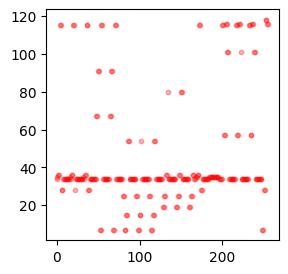

In [26]:
for b in crm_trained.dataloader_0.train():
    song_0  = b[0][0]
    break

for b in crm_trained.dataloader_1.train():
    songs = b 

time = range(0, 256)
time = torch.tensor(time)

fig ,ax = plt.subplots(1,1,figsize=(3,3))
# plt.scatter(time, song_0, s=10, alpha=0.3, c='b')
plt.scatter(time, song_1, s=10, alpha=0.3, c='r')
plt.show()

In [21]:
sample_hist.cpu()[2,-3,:].shape

torch.Size([256])

# Read and Sample from a Model

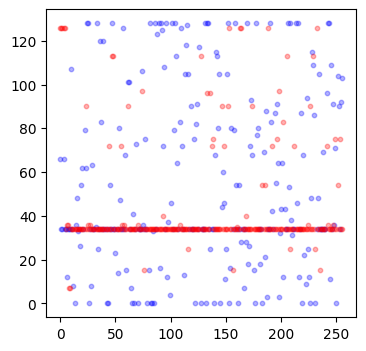

In [22]:
time = range(0, 256)
time = torch.tensor(time)

fig ,ax = plt.subplots(1,1,figsize=(4,4))
# plt.scatter(time, sample_hist.cpu()[0,50,:], s=30, c='g', marker='o', alpha=0.3)
# plt.scatter(time, sample_hist.cpu()[0,-20,:], s=30, c='r', marker='o', alpha=0.3)
# plt.scatter(time, song_1, s=10, c='r', marker='o', alpha=0.3)
plt.scatter(time, sample_hist.cpu()[2,-3,:], s=10, c='b', marker='o', alpha=0.3)
plt.scatter(time, sample_x[0].cpu(), s=10, c='r', marker='o', alpha=0.3)

# plt.scatter(time, sample_x.cpu()[0], s=30, c='g', marker='o', alpha=0.3)

# plt.scatter(time, sample_x[2], s=30, c='purple', marker='+', alpha=0.3),
# plt.scatter(time, sample_x[3], s=30, c='orange', marker='x', alpha=0.3)
# plt.scatter(time, sample_x[4], s=10, c='r', marker='p', alpha=0.3, lw=1)
plt.show()

In [34]:
from torch.nn import functional as F



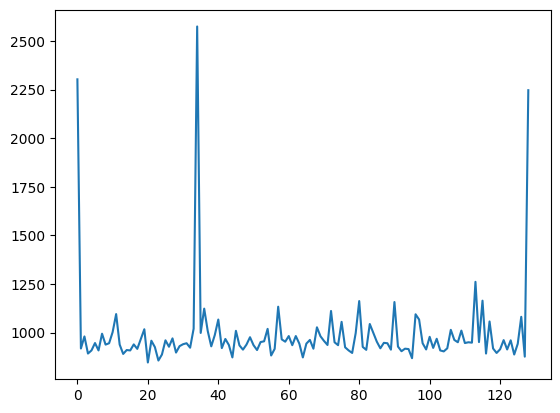

In [44]:


sample = sample_hist.cpu()[:,-1,:]
samp = F.one_hot(sample.long()).sum(axis=1).sum(axis=0)

Xtest

plt.plot(samp)
plt.show()

In [2]:
crm_trained = CRM(experiment_dir='/home/df630/conditional_rate_matching/results/test_piano_roll_transformer/crm/1716268690')
crm_trained.config.pipeline.number_of_steps = 1000
crm_trained.config.pipeline.time_epsilon = 0.1

sample_x, sample_hist, t = crm_trained.pipeline(sample_size=100, train=False, return_path=True)
sample_x = sample_x.cpu()

1000it [02:25,  6.86it/s]


## Read results only (without model initialization)

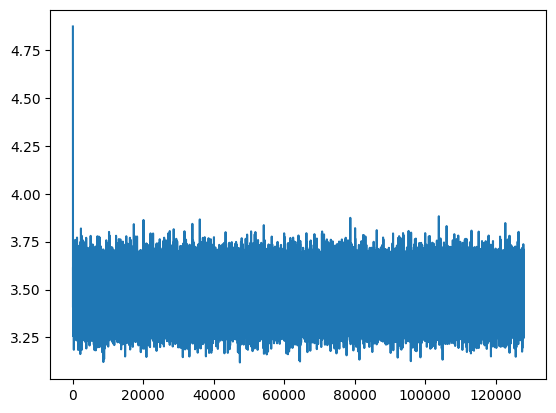

In [4]:
experiment_files = ExperimentFiles(experiment_dir='/home/df630/conditional_rate_matching/results/test_piano_roll_transformer/crm/1716268690')
results_ = experiment_files.load_results()
plt.plot(results_["all_training_loss"])

# Calculate a Metric Again

In [8]:
from conditional_rate_matching.models.metrics.metrics_utils import log_metrics, MetricsAvaliable
metrics_avaliable = MetricsAvaliable()

In [74]:
# number of samples requiered to calculate the test 
# this number should not be that big as the sample and paths are stored to perform the statistics
# crm.config.pipeline.number_of_steps = 100
# crm.config.data1.test_size 

# log_metrics(crm, epoch=None, all_metrics = {}, metrics_to_log={metrics_avaliable.music_plot})

In [41]:
for b in crm.dataloader_0.train():
    song_0  = b[0][0]
    time = range(0, 256)
    time = torch.tensor(time)
    break

for b in crm.dataloader_1.train():
    song_1 = b[0][0]
    break

### data